In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Read the file
df = pd.read_csv('magic04.data')
df.head()

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [3]:
#  Changing the column names
column_names = [
    'fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
    'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'
]
df.columns = column_names
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [4]:
# Gamma or Hadrons
df['class'].unique()
df['class'] = df['class'].map({'g':1, 'h':0})
print(df['class'].value_counts())
df['class'].head()

class
1    12331
0     6688
Name: count, dtype: int64


0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

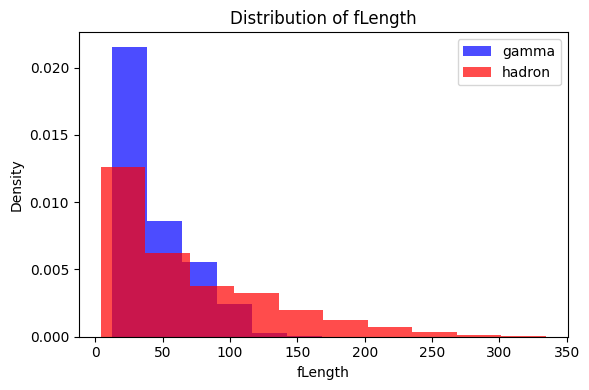

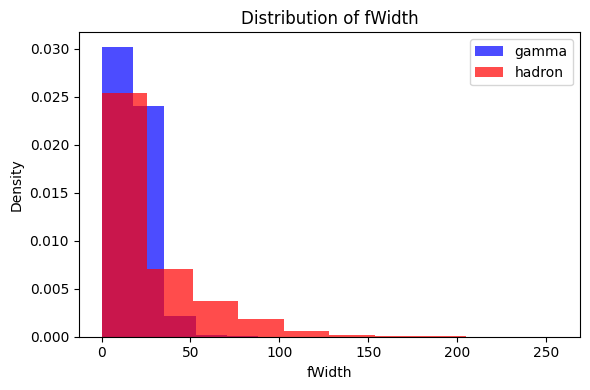

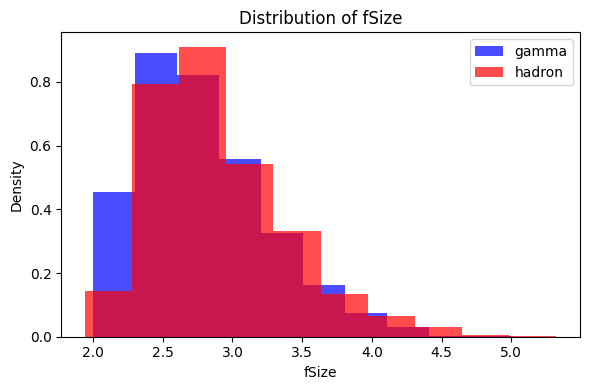

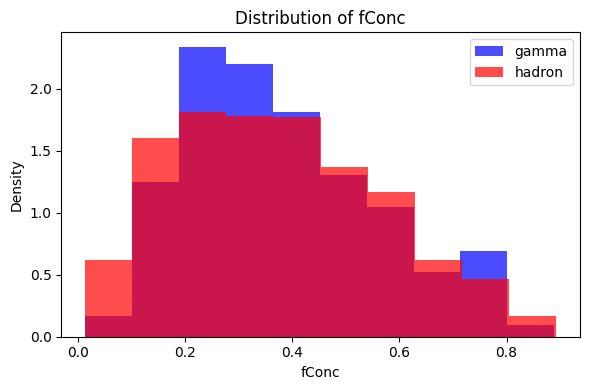

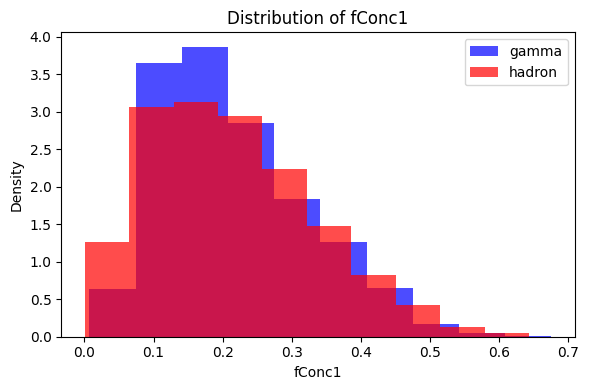

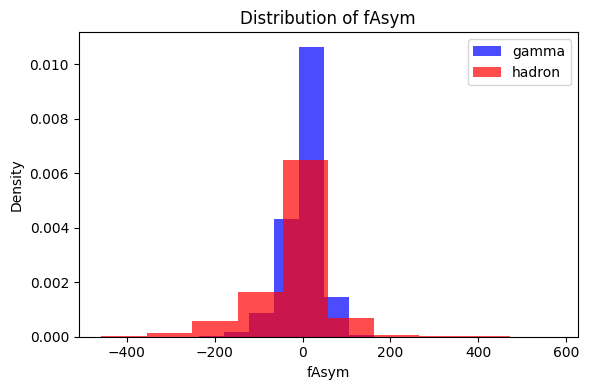

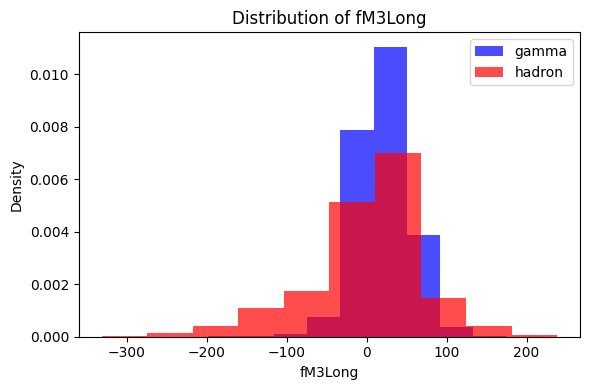

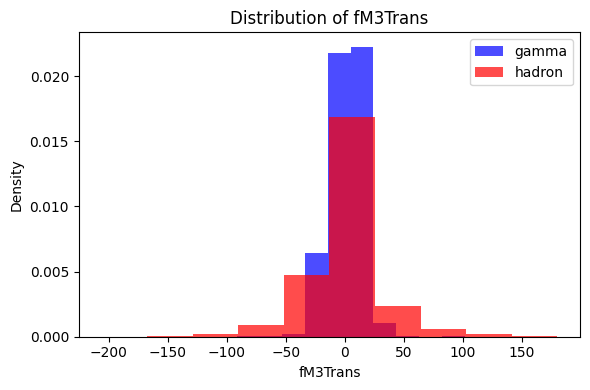

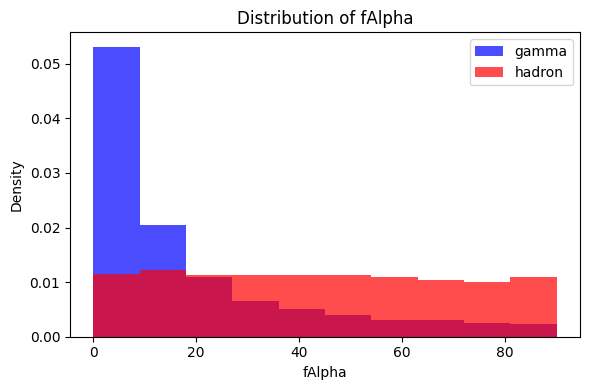

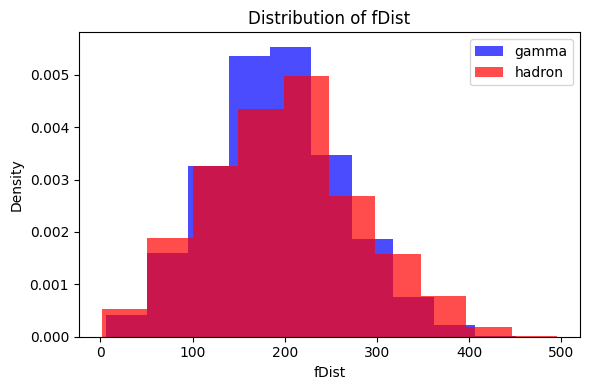

In [5]:
for label in df.columns[:-1]:  
    plt.figure(figsize=(6, 4))
    plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(f'Distribution of {label}')
    plt.xlabel(label)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Scaling

In [6]:
# Scaling
def scale_dataset(df, oversample=False):
    X = df[df.columns[:-1]].values
    y = df[df.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, y.reshape(-1,1)))
    return data, X, y

## Train, test and split

In [7]:
train, valid, test = np.split(df.sample(frac=1).reset_index(drop=True), [int(0.6*len(df)), int(0.8*len(df))])
print(len(train[train['class']==1])) # gamma
print(len(train[train['class']==0])) # hadron - comparatively very less... needs to be balanced

7428
3983


D:\Softwares\anaconda3\envs\tf_kernel\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
# Scaling
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid)
test, X_test, y_test = scale_dataset(test)

## KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1375
           1       0.85      0.87      0.86      2429

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred = nb_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.38      0.48      1375
           1       0.72      0.89      0.79      2429

    accuracy                           0.70      3804
   macro avg       0.68      0.63      0.63      3804
weighted avg       0.69      0.70      0.68      3804



## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = lg_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1375
           1       0.84      0.83      0.83      2429

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## Support Vector Machines (SVM)

In [21]:
from sklearn.svm import SVC 

In [22]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [23]:
y_pred = svm_model.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1375
           1       0.88      0.91      0.90      2429

    accuracy                           0.86      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Network

In [25]:
import tensorflow as tf

In [32]:
# loss and accuracy functions
# Plot the training and validation loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the training and validation accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [27]:
nn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

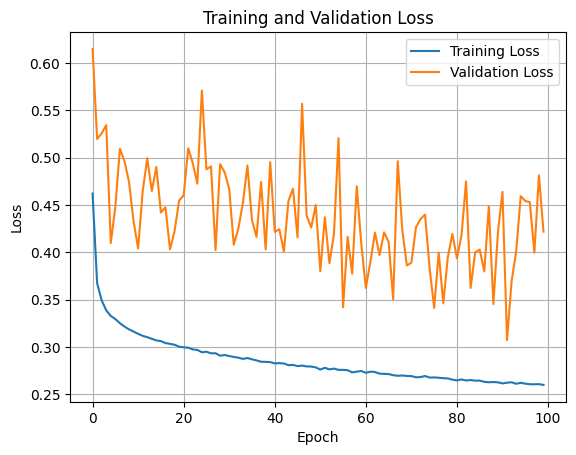

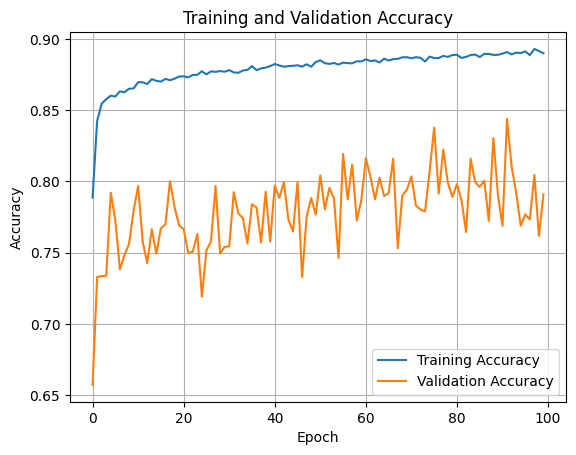

In [33]:
plot_loss(history)
plot_accuracy(history)

In [41]:
y_pred = nn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([0, 0, 1, ..., 0, 1, 1])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1375
           1       0.87      0.94      0.90      2429

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.86      3804

